# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


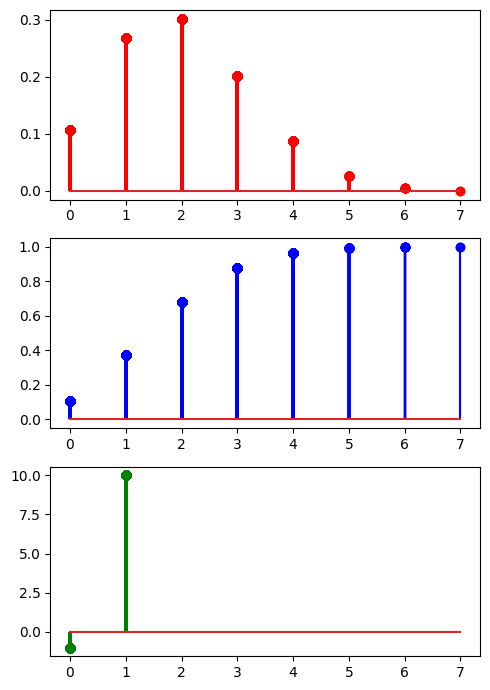

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

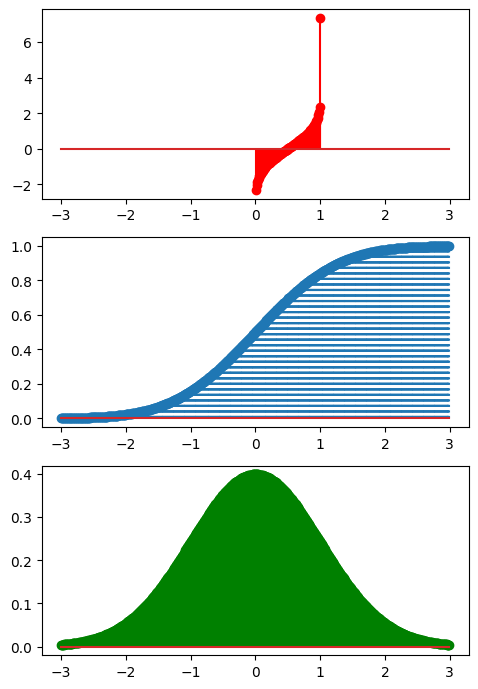

In [43]:
# TODO
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

#para norm ppd tenemos un area q que va de loc hasta infinito negativo, pero no conocemos loc, por lo que norma ppf nos permite encontrar
#conocemos el area q. para parametros de loc y scale podemos utilizar la media y la desviacion estandar respectivamente
#pero los valores por default son 1 y 0. 
#q sera el valor del area que buscamos, ya que si tenemos un area y estamos buscando un valor especifico en X% de esta area, ejemplo: el 78%
#damos un valor de q = .78 y loc sera igual a 1, esto significa que de uno a la izquierda de la curva de distribucion hasta el infinito 
#negativo tendremos un 78% de nuestra distribucion

#Tenemos destribucion normal de percent point function
def mynormppf(area, mean, std):
    result = norm.ppf(q = area, loc = mean, scale= std)
    return result
#DN para probability mass function
def mynormpdf(area, mean, std):
    result = norm.pdf(x = area, loc = mean, scale= std)
    return result
#DN para cumulative distribution function
def mynormcdf(area, mean, std):
    result = norm.cdf(x = area, loc = mean, scale= std)
    return result
#DN para random variates
def mynormrvs(area, mean, std):
    result = norm.rvs(size= area ,loc = mean, scale= std )
    return result


#Declarar datos

np.random.seed(42)

media = 0
deviation = 1
data = np.arange(-3,3,.01)
#print(data)
#Launch las funciones para graficarlas

normppf = mynormppf(area= data, mean= media, std=deviation)
#print(normppf)
normcdf = mynormcdf(area=data, mean=media, std=deviation)
normpdf = mynormpdf(area=data, mean=media, std=deviation)

fig, axis = plt.subplots(3, 1, figsize = (5,7))

axis[0].stem(data, normppf, "r-")
axis[1].stem(data, normcdf, ":")
axis[2].stem(data, normpdf, "g-")

plt.tight_layout()
plt.show()


Escribimos las funciones para distribucion uniforme

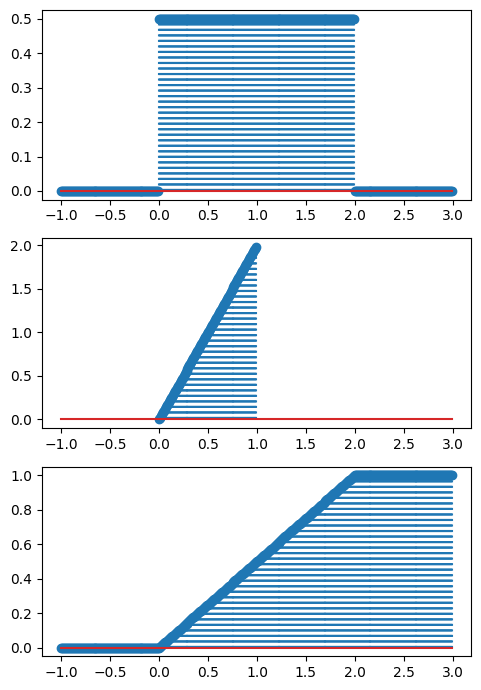

In [61]:
from scipy.stats import uniform
#Now we have to write functions for the 
#pdf (probability density function), the cdf(cumulative
#distribution function) and ppd(percent point function)
#also rvs for generating random numbers
#Function For the probability density function
def myunipdf (a, low, high):
    result = uniform.pdf(a, loc=low, scale=(high-low))
    return result
#Function for the percent point function
def myunippf(b,low,high):
    result = uniform.ppf(b, loc= low, scale = (high-low))
    return result
#Function for cumulative distribution function 
def myunicdf(c, low, high):
    result = uniform.cdf(c, loc = low, scale=(high-low))
    return result 
#function for creating random numbers
def myunir(d,low,high):
    result = uniform.rvs(d, loc = low, scale=(high-low))
    return result
#now we take some data for the functions to plot
np.random.seed(42)

low = 0
high = 2 
size = np.arange(-1,3,.01)
unipdf = myunipdf(size, low=low, high=high)
unippf = myunippf(size, low=low, high=high)
unicdf = myunicdf(size, low=low, high=high)
#randomuni = myunir(200, low=low, high= high)

fig, axis = plt.subplots(3,1, figsize=(5,7))
axis[0].stem(size, unipdf, ':')
axis[1].stem(size, unippf, ':')
axis[2].stem(size, unicdf, ':')
#axis[3].stem(size, randomuni, 'r-')

plt.tight_layout()
plt.show()


